In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!apt-get install -y libcurl4-openssl-dev libssl-dev libxml2-dev
!apt-get install -y r-base


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libcurl4-openssl-dev is already the newest version (7.81.0-1ubuntu1.20).
libssl-dev is already the newest version (3.0.2-0ubuntu1.19).
libxml2-dev is already the newest version (2.9.13+dfsg-1ubuntu0.7).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.5.1-1.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [4]:
%load_ext rpy2.ipython


In [7]:
%%R
# 4. Cài đặt các package cần thiết (chạy 1 lần nếu chưa có)
packages <- c("readr", "dplyr", "caret", "xgboost", "randomForest", "e1071", "nnet")
new_packages <- packages[!(packages %in% installed.packages()[,"Package"])]
if(length(new_packages)) install.packages(new_packages)

# 5. Load thư viện
library(readr)
library(dplyr)
library(caret)
library(xgboost)
library(randomForest)
library(e1071)
library(nnet)

# 6. Đọc dữ liệu
df <- read_csv("/content/drive/MyDrive/DSR/students_habit_predict_mental_health.csv")

# 7. Nếu file có cột đầu là index (ID), hãy bỏ cột đó:
# df <- df[, -1]  # Bỏ comment nếu cần

# 8. Tách đặc trưng và mục tiêu
y <- df$mental_health_rating
X <- df %>% select(-mental_health_rating)

# 9. Chia dữ liệu train-test
set.seed(42)
train_index <- createDataPartition(y, p = 0.8, list = FALSE)
X_train <- X[train_index, ]
X_test <- X[-train_index, ]
y_train <- y[train_index]
y_test <- y[-train_index]

# 10. Chuẩn hóa dữ liệu
scaler <- preProcess(X_train, method = c("center", "scale"))
X_train_scaled <- predict(scaler, X_train)
X_test_scaled <- predict(scaler, X_test)

# 11. Hàm đánh giá mô hình
evaluate_model <- function(model, X_test, y_test, name) {
  preds <- predict(model, X_test)
  mse <- mean((y_test - preds)^2)
  r2 <- cor(y_test, preds)^2
  cat(sprintf("\n%s:\n  MSE: %.2f\n  R²: %.3f\n", name, mse, r2))
}

# 12. Huấn luyện và đánh giá các mô hình

# Linear Regression
model_lm <- lm(y_train ~ ., data = X_train_scaled)
evaluate_model(model_lm, X_test_scaled, y_test, "Linear Regression")

# Ridge Regression
model_ridge <- train(X_train_scaled, y_train, method = "ridge",
                     trControl = trainControl(method = "cv", number = 5),
                     tuneLength = 5)
evaluate_model(model_ridge, X_test_scaled, y_test, "Ridge Regression")

# Random Forest
model_rf <- randomForest(x = X_train, y = y_train, ntree = 150)
evaluate_model(model_rf, X_test, y_test, "Random Forest")

# XGBoost
dtrain <- xgb.DMatrix(data = as.matrix(X_train), label = y_train)
dtest <- xgb.DMatrix(data = as.matrix(X_test))
model_xgb <- xgboost(data = dtrain, nrounds = 150, eta = 0.05, max_depth = 4,
                     objective = "reg:squarederror", verbose = 0)
preds_xgb <- predict(model_xgb, dtest)
mse_xgb <- mean((y_test - preds_xgb)^2)
r2_xgb <- cor(y_test, preds_xgb)^2
cat(sprintf("\nXGBoost:\n  MSE: %.2f\n  R²: %.3f\n", mse_xgb, r2_xgb))

# SVR
model_svr <- svm(X_train_scaled, y_train, kernel = "radial")
evaluate_model(model_svr, X_test_scaled, y_test, "SVR")

# MLP Regressor
model_mlp <- nnet(X_train_scaled, y_train, size = 8, linout = TRUE, maxit = 1000, trace = FALSE)
evaluate_model(model_mlp, X_test_scaled, y_test, "Neural Network (MLP)")


New names:
• `` -> `...1`
Rows: 1000 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (16): ...1, age, gender, study_hours_per_day, social_media_hours, netfli...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Linear Regression:
  MSE: 4.33
  R²: 0.495
1 package is needed and is not installed. (elasticnet). Would you like to try to install it now?
1: yes
2: no

Selection: yes

Ridge Regression:
  MSE: 4.33
  R²: 0.495

Random Forest:
  MSE: 5.80
  R²: 0.366

XGBoost:
  MSE: 5.36
  R²: 0.374

SVR:
  MSE: 5.53
  R²: 0.352

Neural Network (MLP):
  MSE: 12471.90
  R²: 0.005


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’, ‘proxy’

trying URL 'https://cran.rstudio.com/src/contrib/listenv_0.9.1.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/parallelly_1.45.0.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/future_1.58.0.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/globals_0.18.0.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/shape_1.4.6.1.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/future.apply_1.20.0.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/numDeriv_2016.8-1.1.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/progressr_0.15.1.tar.gz'
trying

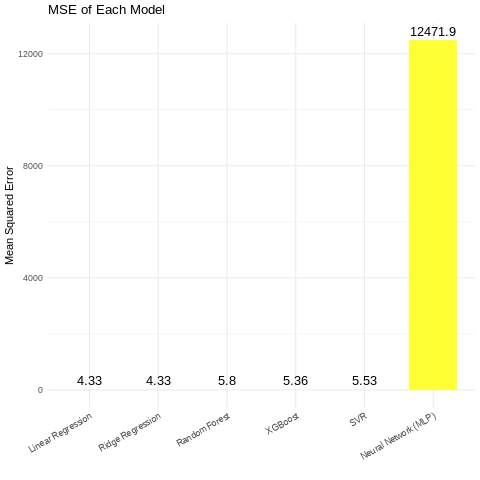

In [20]:
%%R
library(ggplot2)

# Đảm bảo cột Model là factor để giữ đúng thứ tự
results_df$Model <- factor(results_df$Model, levels = results_df$Model)



# Biểu đồ MSE
ggplot(results_df, aes(x = Model, y = MSE, fill = Model)) +
  geom_bar(stat = "identity", width = 0.7) +
  geom_text(aes(label = round(MSE, 2)), vjust = -0.5, size = 4.5) +
  labs(title = "MSE of Each Model", x = "", y = "Mean Squared Error") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 30, hjust = 1),
        legend.position = "none") +
  scale_fill_brewer(palette = "Set1")


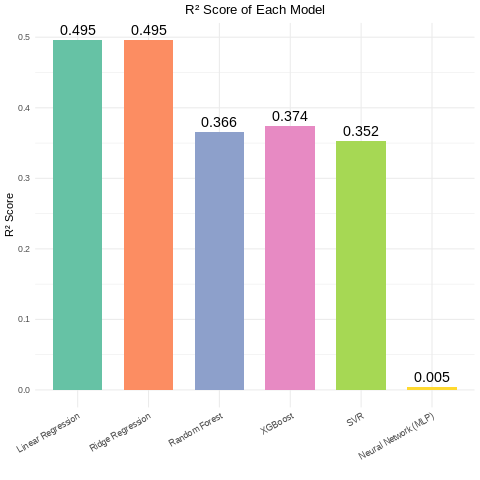

In [19]:
%%R
# 1. Tạo bảng tổng hợp kết quả từ các mô hình
results_df <- data.frame(
  Model = c("Linear Regression", "Ridge Regression", "Random Forest", "XGBoost", "SVR", "Neural Network (MLP)"),
  MSE = c(
    mean((y_test - predict(model_lm, X_test_scaled))^2),
    mean((y_test - predict(model_ridge, X_test_scaled))^2),
    mean((y_test - predict(model_rf, X_test))^2),
    mse_xgb,
    mean((y_test - predict(model_svr, X_test_scaled))^2),
    mean((y_test - predict(model_mlp, X_test_scaled))^2)
  ),
  R2 = c(
    cor(y_test, predict(model_lm, X_test_scaled))^2,
    cor(y_test, predict(model_ridge, X_test_scaled))^2,
    cor(y_test, predict(model_rf, X_test))^2,
    r2_xgb,
    cor(y_test, predict(model_svr, X_test_scaled))^2,
    cor(y_test, predict(model_mlp, X_test_scaled))^2
  )
)

# 2. Vẽ biểu đồ R²
library(ggplot2)

results_df$Model <- factor(results_df$Model, levels = results_df$Model)

ggplot(results_df, aes(x = Model, y = R2, fill = Model)) +
  geom_bar(stat = "identity", width = 0.7) +
  geom_text(aes(label = round(R2, 3)), vjust = -0.5, size = 5) +
  labs(title = "R² Score of Each Model", x = "", y = "R² Score") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 30, hjust = 1),
        plot.title = element_text(hjust = 0.5),
        legend.position = "none") +
  scale_fill_brewer(palette = "Set2")
